## Preliminaries

In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import time
t0start = time.time() 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# PY-BOOST Install (GPU only)

In [24]:
# that works for CPU also
!pip install py-boost
!pip install category-encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 50.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 96.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.6/36.6 MB 40.8 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: scipy
    Found existing installation: scipy 1.9.2
    Uninstalling scipy-1.9.2:
      Successfully uninstalled scipy-1.9.2


## Import will work only for GPU

In [11]:
import os
# Optional: set the device to run
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

os.makedirs('../data', exist_ok=True)

import joblib
from sklearn.datasets import make_regression
import numpy as np

# simple case - just one class is used
from py_boost import GradientBoosting, TLPredictor, TLCompiledPredictor
from py_boost.cv import CrossValidation

## Check

In [12]:
%%time
model = GradientBoosting('mse')
model
# model.fit(X,Y)
# model.fit(X, y[:, 0], eval_sets=[{'X': X_test, 'y': y_test[:, 0]},])

CPU times: user 36 µs, sys: 1 µs, total: 37 µs
Wall time: 41 µs


# Load data

(614, 18216)


,cell_type,sm_name,sm_lincs_id,SMILES,control,A1BG,A1BG-AS1,A2M,A2M-AS1,A2MP1,...,ZUP1,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1
0,NK cells,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,False,0.104720,-0.077524,-1.625596,-0.144545,0.143555,...,-0.227781,-0.010752,-0.023881,0.674536,-0.453068,0.005164,-0.094959,0.034127,0.221377,0.368755
1,T cells CD4+,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,False,0.915953,-0.884380,0.371834,-0.081677,-0.498266,...,-0.494985,-0.303419,0.304955,-0.333905,-0.315516,-0.369626,-0.095079,0.704780,1.096702,-0.869887
2,T cells CD8+,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,False,-0.387721,-0.305378,0.567777,0.303895,-0.022653,...,-0.119422,-0.033608,-0.153123,0.183597,-0.555678,-1.494789,-0.213550,0.415768,0.078439,-0.259365
3,T regulatory cells,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,False,0.232893,0.129029,0.336897,0.486946,0.767661,...,0.451679,0.704643,0.015468,-0.103868,0.865027,0.189114,0.224700,-0.048233,0.216139,-0.085024
4,NK cells,Mometasone Furoate,LSM-3349,C[C@@H]1C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C...,False,4.290652,-0.063864,-0.017443,-0.541154,0.570982,...,0.758474,0.510762,0.607401,-0.123059,0.214366,0.487838,-0.819775,0.112365,-0.122193,0.676629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,T regulatory cells,Atorvastatin,LSM-5771,CC(C)c1c(C(=O)Nc2ccccc2)c(-c2ccccc2)c(-c2ccc(F...,False,-0.014372,-0.122464,-0.456366,-0.147894,-0.545382,...,-0.549987,-2.200925,0.359806,1.073983,0.356939,-0.029603,-0.528817,0.105138,0.491015,-0.979951
610,NK cells,Riociguat,LSM-45758,COC(=O)N(C)c1c(N)nc(-c2nn(Cc3ccccc3F)c3ncccc23...,False,-0.455549,0.188181,0.595734,-0.100299,0.786192,...,-1.236905,0.003854,-0.197569,-0.175307,0.101391,1.028394,0.034144,-0.231642,1.023994,-0.064760
611,T cells CD4+,Riociguat,LSM-45758,COC(=O)N(C)c1c(N)nc(-c2nn(Cc3ccccc3F)c3ncccc23...,False,0.338168,-0.109079,0.270182,-0.436586,-0.069476,...,0.077579,-1.101637,0.457201,0.535184,-0.198404,-0.005004,0.552810,-0.209077,0.389751,-0.337082
612,T cells CD8+,Riociguat,LSM-45758,COC(=O)N(C)c1c(N)nc(-c2nn(Cc3ccccc3F)c3ncccc23...,False,0.101138,-0.409724,-0.606292,-0.071300,-0.001789,...,0.005951,-0.893093,-1.003029,-0.080367,-0.076604,0.024849,0.012862,-0.029684,0.005506,-1.733112


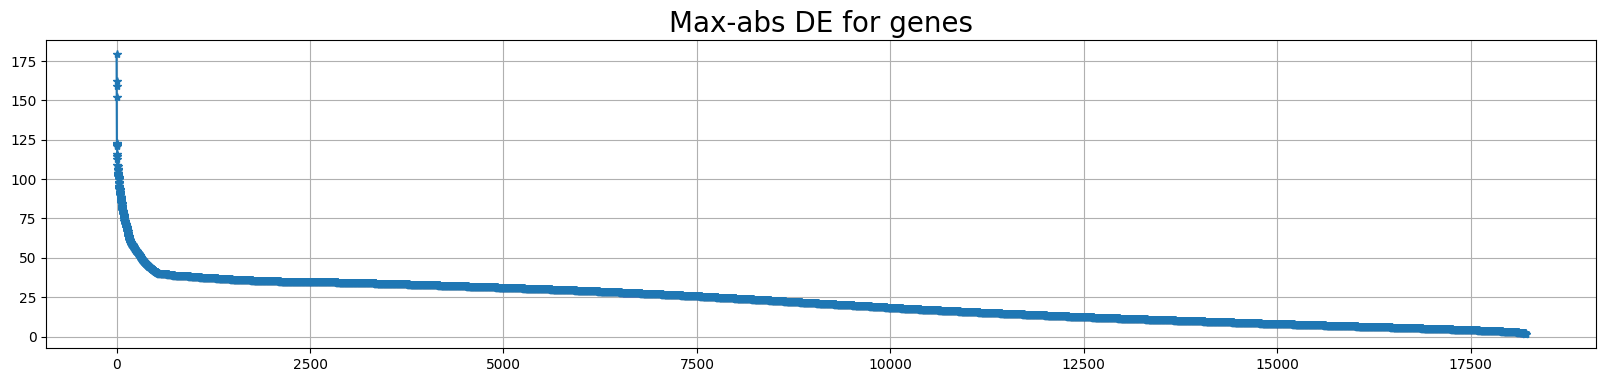

STMN1       179.324177
METRN       162.088860
FTL         159.274883
PPA1        152.001245
HSP90AA1    122.719132
RPS19       122.048431
TMEM256     121.634094
HSP90AB1    120.897862
H2AFJ       116.239047
TXNIP       114.745568
PGP         114.435977
DNAJB1      112.589257
BEX5        108.819130
MRPL18      108.393191
TUFM        106.542128
dtype: float64

(255, 3)


,id,cell_type,sm_name
0,0,B cells,5-(9-Isopropyl-8-methyl-2-morpholino-9H-purin-...
1,1,B cells,ABT-199 (GDC-0199)
2,2,B cells,ABT737
3,3,B cells,AMD-070 (hydrochloride)
4,4,B cells,AT 7867
...,...,...,...
250,250,Myeloid cells,Vandetanib
251,251,Myeloid cells,Vanoxerine
252,252,Myeloid cells,Vardenafil
253,253,Myeloid cells,Vorinostat


(255, 18211)


,A1BG,A1BG-AS1,A2M,A2M-AS1,A2MP1,A4GALT,AAAS,AACS,AAGAB,AAK1,...,ZUP1,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1
id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


CPU times: user 3.36 s, sys: 414 ms, total: 3.77 s
Wall time: 3.09 s


In [15]:
%%time
input_path = './input'
#input_path = '/kaggle/input/open-problems-single-cell-perturbations'

fn = f'{input_path}/de_train.parquet'
df_de_train = pd.read_parquet(fn)# , index_col = 0)
genes = df_de_train.columns[5:]
print(df_de_train.shape)
display(df_de_train )

plt.figure(figsize = (20,4) )
v = df_de_train.iloc[:,5:].max(axis = 0 ).sort_values(ascending = False, key = abs )
plt.plot(v.values,'*-')
plt.title('Max-abs DE for genes',fontsize = 20 )
plt.grid()
plt.show()
display(v.head(15))

# %%time
fn = f'{input_path}/id_map.csv'
df_id_map = pd.read_csv(fn)
print(df_id_map.shape)
display(df_id_map)
fn = f'{input_path}/sample_submission.csv'
df_sample_submit = pd.read_csv(fn, index_col = 0)
print(df_sample_submit.shape)
display( df_sample_submit )


#features_columns = ['cell_type','sm_name']
# selected_features_columns = ['cell_type','sm_name']  # [ 'sm_name'] # What features to consider - others not used 


In [6]:
all_sm_names = df_de_train[df_de_train["cell_type"]=="B cells"]["sm_name"].to_list()
all_de_train = df_de_train[df_de_train["sm_name"].isin(all_sm_names)]
all_de_train

,cell_type,sm_name,sm_lincs_id,SMILES,control,A1BG,A1BG-AS1,A2M,A2M-AS1,A2MP1,...,ZUP1,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1
8,B cells,Idelalisib,LSM-1205,CC[C@H](Nc1ncnc2[nH]cnc12)c1nc2cccc(F)c2c(=O)n...,False,0.394173,-0.153824,0.178232,0.566241,0.391377,...,-1.052302,-1.176587,-1.220291,-0.278944,-0.095066,1.101790,0.061803,1.406335,-0.264996,-0.119743
9,Myeloid cells,Idelalisib,LSM-1205,CC[C@H](Nc1ncnc2[nH]cnc12)c1nc2cccc(F)c2c(=O)n...,False,0.025146,0.316388,1.366885,1.301593,2.317619,...,-0.902546,-1.445523,0.794772,0.428973,0.605834,0.271988,0.492231,0.354721,1.471559,-0.259483
10,NK cells,Idelalisib,LSM-1205,CC[C@H](Nc1ncnc2[nH]cnc12)c1nc2cccc(F)c2c(=O)n...,False,0.861487,-0.112313,-0.355217,0.719999,0.655865,...,0.035687,0.138060,-0.776619,-0.109832,-0.189906,0.753086,0.190892,-0.141699,-0.756510,-0.076934
11,T cells CD4+,Idelalisib,LSM-1205,CC[C@H](Nc1ncnc2[nH]cnc12)c1nc2cccc(F)c2c(=O)n...,False,0.206471,0.014638,-0.247518,0.430198,0.103020,...,-0.018902,-1.013426,-1.196254,-0.983257,1.097309,-0.090271,-1.293485,0.118196,-0.120892,-0.411331
12,T cells CD8+,Idelalisib,LSM-1205,CC[C@H](Nc1ncnc2[nH]cnc12)c1nc2cccc(F)c2c(=O)n...,False,0.046959,-0.346839,0.023478,0.485611,0.005066,...,0.017437,0.537964,-0.219895,0.376181,0.706930,-0.554368,0.035559,-0.189976,-0.145465,0.109084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557,Myeloid cells,CHIR-99021,LSM-1181,Cc1cnc(-c2cnc(NCCNc3ccc(C#N)cn3)nc2-c2ccc(Cl)c...,False,0.338227,-0.431007,0.066335,-0.907600,0.973881,...,0.187125,0.800574,0.214946,-0.104931,-0.125619,-0.160210,-0.886414,-2.955785,-0.866944,-0.053017
558,NK cells,CHIR-99021,LSM-1181,Cc1cnc(-c2cnc(NCCNc3ccc(C#N)cn3)nc2-c2ccc(Cl)c...,False,-1.026443,-0.024840,0.204772,-0.861985,-2.972540,...,0.323512,1.131738,-0.064157,0.011429,0.030404,0.015837,-0.055027,-0.329874,0.327199,-0.830306
559,T cells CD4+,CHIR-99021,LSM-1181,Cc1cnc(-c2cnc(NCCNc3ccc(C#N)cn3)nc2-c2ccc(Cl)c...,False,-0.545092,0.108150,-0.355024,-1.659293,-0.613075,...,2.537207,-0.429731,-0.605248,0.304310,-0.014653,0.000120,-1.117706,-0.130162,0.001642,-0.665771
560,T cells CD8+,CHIR-99021,LSM-1181,Cc1cnc(-c2cnc(NCCNc3ccc(C#N)cn3)nc2-c2ccc(Cl)c...,False,0.342721,0.921447,-2.992502,-0.842775,-0.408755,...,0.240196,0.302058,-0.555482,-0.009563,0.029517,0.037701,-0.257844,-1.374965,-1.202369,-0.676311


In [16]:
cell_type_mean = all_de_train.groupby("cell_type")[genes].mean()
cell_type_mean.columns = [f'cell_mean_{gene}' for gene in genes]
cell_type_mean = cell_type_mean.reset_index()
cell_type_mean['cell_type'] = cell_type_mean['cell_type'].astype(str)
cell_type_mean

,cell_type,cell_mean_A1BG,cell_mean_A1BG-AS1,cell_mean_A2M,cell_mean_A2M-AS1,cell_mean_A2MP1,cell_mean_A4GALT,cell_mean_AAAS,cell_mean_AACS,cell_mean_AAGAB,...,cell_mean_ZUP1,cell_mean_ZW10,cell_mean_ZWILCH,cell_mean_ZWINT,cell_mean_ZXDA,cell_mean_ZXDB,cell_mean_ZXDC,cell_mean_ZYG11B,cell_mean_ZYX,cell_mean_ZZEF1
0,B cells,1.380890,0.530585,1.340812,1.594307,4.927551,3.613191,0.028640,0.544636,0.723079,...,0.257778,0.674977,0.217386,1.439374,0.952903,0.581303,0.637408,0.517737,-0.207092,0.079199
1,Myeloid cells,1.570336,0.752564,-2.856826,0.887845,6.658911,4.034911,0.442943,0.403543,0.196285,...,-0.270423,-0.103318,-1.307952,-0.166312,1.883588,0.612681,-0.583563,-0.427938,-0.292768,-0.067723
2,NK cells,1.726861,1.391056,-0.384683,-0.909542,0.735264,4.687871,0.460742,1.023145,0.046517,...,0.511199,0.462575,0.388045,0.784062,0.945736,1.232050,0.106880,0.600556,-0.585519,-0.156448
3,T cells CD4+,0.160548,0.469133,-0.074140,-1.055539,0.006779,2.138308,-0.247477,0.669044,0.630691,...,1.231267,0.601618,0.150675,0.811554,0.616685,0.330778,0.181473,0.175703,-0.472213,-0.099220
4,T cells CD8+,-0.259045,-0.142500,-0.402029,-0.313932,-0.436765,-0.769503,-0.118564,0.039057,-0.710979,...,0.135679,0.029111,-0.293163,-0.188252,0.014929,-0.223888,0.110891,-0.155235,-0.318527,0.253286
5,T regulatory cells,1.740391,1.263407,2.306707,2.578485,2.978225,2.920715,0.274367,1.225981,0.012020,...,-0.018877,1.311463,0.817281,1.549286,2.184906,2.333129,1.334974,0.791717,-0.092324,-0.028916


In [17]:
sm_name_mean = df_de_train.groupby("sm_name")[genes].mean()
sm_name_mean.columns = [f'sm_mean_{gene}' for gene in genes]
sm_name_mean = sm_name_mean.reset_index()
sm_name_mean['sm_name'] = sm_name_mean['sm_name'].astype(str)
sm_name_mean

,sm_name,sm_mean_A1BG,sm_mean_A1BG-AS1,sm_mean_A2M,sm_mean_A2M-AS1,sm_mean_A2MP1,sm_mean_A4GALT,sm_mean_AAAS,sm_mean_AACS,sm_mean_AAGAB,...,sm_mean_ZUP1,sm_mean_ZW10,sm_mean_ZWILCH,sm_mean_ZWINT,sm_mean_ZXDA,sm_mean_ZXDB,sm_mean_ZXDC,sm_mean_ZYG11B,sm_mean_ZYX,sm_mean_ZZEF1
0,5-(9-Isopropyl-8-methyl-2-morpholino-9H-purin-...,0.300267,-0.112432,0.413144,1.468632,0.733237,0.722462,0.125359,0.210903,-0.876761,...,-0.769578,-0.690020,0.303616,0.260685,0.555278,0.837875,0.444535,0.432414,-0.219858,0.551906
1,ABT-199 (GDC-0199),-0.081286,0.007314,0.081242,-0.125777,0.219469,0.258288,-0.160568,0.023898,0.317472,...,0.430786,0.094845,-0.088646,-0.140509,0.216322,-0.065943,0.113272,-0.181743,0.068095,-0.093228
2,ABT737,0.408012,0.322574,0.107448,-0.049174,0.422284,1.151523,0.751861,0.189453,-0.121147,...,0.186543,-0.180051,0.028183,0.413515,0.166978,0.327588,0.256550,-0.069630,-0.135967,-0.728025
3,AMD-070 (hydrochloride),-0.031131,0.533648,0.124738,0.241484,-0.017756,0.039647,-0.173965,0.806999,-0.019594,...,-0.100840,0.065319,0.193013,0.310814,0.018807,0.144418,0.000372,0.204476,-0.077820,0.166340
4,AT 7867,0.242736,-0.275840,0.158312,0.267365,-0.003346,0.183553,-0.228290,0.162294,-0.240859,...,-0.704684,-0.088803,-0.120544,-0.337481,0.051235,0.466585,-0.157225,0.622629,0.022401,0.079217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,Vandetanib,-0.006076,-0.672747,-0.230338,-0.492947,0.109427,-0.528983,0.030436,0.155058,-0.130232,...,0.113566,-0.056856,-0.375688,-0.098679,-0.203246,-0.313355,0.105695,-0.004788,0.135301,0.254045
142,Vanoxerine,0.188002,-0.459637,0.107419,0.442630,0.288657,0.239626,-0.191168,-0.257659,-0.149061,...,0.023219,-0.114899,0.148367,0.166318,0.220331,-0.095794,-0.191277,0.358461,-0.246971,-0.221379
143,Vardenafil,-0.097319,0.526795,-0.339189,-0.156595,0.021584,-0.269225,-0.216612,-0.447963,0.047921,...,0.044047,0.050485,0.528853,0.162957,0.079624,-0.091698,-0.154987,0.191808,0.325303,-0.385319
144,Vorinostat,0.075208,0.014575,0.454048,-0.009477,0.342563,-0.226654,0.517033,0.845815,1.743839,...,0.320819,0.542119,-0.402185,-0.104306,-0.586294,0.382534,-0.107183,0.212404,-0.029705,0.270488


In [18]:
def transform_de(df):
    df_long = df.copy()
    df_long = pd.merge(df_long, cell_type_mean, on="cell_type", how="left")
    df_long = pd.merge(df_long, sm_name_mean, on="sm_name", how="left")
    
    return df_long
    

df_de_train = transform_de(df_de_train)
df_id_map = transform_de(df_id_map)

display(df_de_train)
display(df_id_map)

,cell_type,sm_name,sm_lincs_id,SMILES,control,A1BG,A1BG-AS1,A2M,A2M-AS1,A2MP1,...,sm_mean_ZUP1,sm_mean_ZW10,sm_mean_ZWILCH,sm_mean_ZWINT,sm_mean_ZXDA,sm_mean_ZXDB,sm_mean_ZXDC,sm_mean_ZYG11B,sm_mean_ZYX,sm_mean_ZZEF1
0,NK cells,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,False,0.104720,-0.077524,-1.625596,-0.144545,0.143555,...,-0.097627,0.089216,0.035855,0.105090,-0.114809,-0.417534,-0.044722,0.276610,0.403164,-0.211380
1,T cells CD4+,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,False,0.915953,-0.884380,0.371834,-0.081677,-0.498266,...,-0.097627,0.089216,0.035855,0.105090,-0.114809,-0.417534,-0.044722,0.276610,0.403164,-0.211380
2,T cells CD8+,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,False,-0.387721,-0.305378,0.567777,0.303895,-0.022653,...,-0.097627,0.089216,0.035855,0.105090,-0.114809,-0.417534,-0.044722,0.276610,0.403164,-0.211380
3,T regulatory cells,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,False,0.232893,0.129029,0.336897,0.486946,0.767661,...,-0.097627,0.089216,0.035855,0.105090,-0.114809,-0.417534,-0.044722,0.276610,0.403164,-0.211380
4,NK cells,Mometasone Furoate,LSM-3349,C[C@@H]1C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C...,False,4.290652,-0.063864,-0.017443,-0.541154,0.570982,...,-0.157324,0.386411,0.330060,0.204926,0.231450,0.475624,0.274146,0.057875,-1.131550,0.613541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,T regulatory cells,Atorvastatin,LSM-5771,CC(C)c1c(C(=O)Nc2ccccc2)c(-c2ccccc2)c(-c2ccc(F...,False,-0.014372,-0.122464,-0.456366,-0.147894,-0.545382,...,-0.198790,-0.143693,0.355118,-0.312425,0.264163,0.189755,-0.069407,0.077091,0.013840,-0.610520
610,NK cells,Riociguat,LSM-45758,COC(=O)N(C)c1c(N)nc(-c2nn(Cc3ccccc3F)c3ncccc23...,False,-0.455549,0.188181,0.595734,-0.100299,0.786192,...,-0.230258,-1.059673,-0.272358,-0.160014,-0.326247,0.231997,0.133820,-0.268421,0.330302,-0.721409
611,T cells CD4+,Riociguat,LSM-45758,COC(=O)N(C)c1c(N)nc(-c2nn(Cc3ccccc3F)c3ncccc23...,False,0.338168,-0.109079,0.270182,-0.436586,-0.069476,...,-0.230258,-1.059673,-0.272358,-0.160014,-0.326247,0.231997,0.133820,-0.268421,0.330302,-0.721409
612,T cells CD8+,Riociguat,LSM-45758,COC(=O)N(C)c1c(N)nc(-c2nn(Cc3ccccc3F)c3ncccc23...,False,0.101138,-0.409724,-0.606292,-0.071300,-0.001789,...,-0.230258,-1.059673,-0.272358,-0.160014,-0.326247,0.231997,0.133820,-0.268421,0.330302,-0.721409


,id,cell_type,sm_name,cell_mean_A1BG,cell_mean_A1BG-AS1,cell_mean_A2M,cell_mean_A2M-AS1,cell_mean_A2MP1,cell_mean_A4GALT,cell_mean_AAAS,...,sm_mean_ZUP1,sm_mean_ZW10,sm_mean_ZWILCH,sm_mean_ZWINT,sm_mean_ZXDA,sm_mean_ZXDB,sm_mean_ZXDC,sm_mean_ZYG11B,sm_mean_ZYX,sm_mean_ZZEF1
0,0,B cells,5-(9-Isopropyl-8-methyl-2-morpholino-9H-purin-...,1.380890,0.530585,1.340812,1.594307,4.927551,3.613191,0.028640,...,-0.769578,-0.690020,0.303616,0.260685,0.555278,0.837875,0.444535,0.432414,-0.219858,0.551906
1,1,B cells,ABT-199 (GDC-0199),1.380890,0.530585,1.340812,1.594307,4.927551,3.613191,0.028640,...,0.430786,0.094845,-0.088646,-0.140509,0.216322,-0.065943,0.113272,-0.181743,0.068095,-0.093228
2,2,B cells,ABT737,1.380890,0.530585,1.340812,1.594307,4.927551,3.613191,0.028640,...,0.186543,-0.180051,0.028183,0.413515,0.166978,0.327588,0.256550,-0.069630,-0.135967,-0.728025
3,3,B cells,AMD-070 (hydrochloride),1.380890,0.530585,1.340812,1.594307,4.927551,3.613191,0.028640,...,-0.100840,0.065319,0.193013,0.310814,0.018807,0.144418,0.000372,0.204476,-0.077820,0.166340
4,4,B cells,AT 7867,1.380890,0.530585,1.340812,1.594307,4.927551,3.613191,0.028640,...,-0.704684,-0.088803,-0.120544,-0.337481,0.051235,0.466585,-0.157225,0.622629,0.022401,0.079217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,250,Myeloid cells,Vandetanib,1.570336,0.752564,-2.856826,0.887845,6.658911,4.034911,0.442943,...,0.113566,-0.056856,-0.375688,-0.098679,-0.203246,-0.313355,0.105695,-0.004788,0.135301,0.254045
251,251,Myeloid cells,Vanoxerine,1.570336,0.752564,-2.856826,0.887845,6.658911,4.034911,0.442943,...,0.023219,-0.114899,0.148367,0.166318,0.220331,-0.095794,-0.191277,0.358461,-0.246971,-0.221379
252,252,Myeloid cells,Vardenafil,1.570336,0.752564,-2.856826,0.887845,6.658911,4.034911,0.442943,...,0.044047,0.050485,0.528853,0.162957,0.079624,-0.091698,-0.154987,0.191808,0.325303,-0.385319
253,253,Myeloid cells,Vorinostat,1.570336,0.752564,-2.856826,0.887845,6.658911,4.034911,0.442943,...,0.320819,0.542119,-0.402185,-0.104306,-0.586294,0.382534,-0.107183,0.212404,-0.029705,0.270488


In [19]:
selected_features_columns = ["cell_type", "sm_name"] + df_de_train.columns.to_list()[5+len(genes):]
selected_features_columns

['cell_type',
 'sm_name',
 'cell_mean_A1BG',
 'cell_mean_A1BG-AS1',
 'cell_mean_A2M',
 'cell_mean_A2M-AS1',
 'cell_mean_A2MP1',
 'cell_mean_A4GALT',
 'cell_mean_AAAS',
 'cell_mean_AACS',
 'cell_mean_AAGAB',
 'cell_mean_AAK1',
 'cell_mean_AAMDC',
 'cell_mean_AAMP',
 'cell_mean_AAR2',
 'cell_mean_AARS',
 'cell_mean_AARS2',
 'cell_mean_AARSD1',
 'cell_mean_AASDH',
 'cell_mean_AASDHPPT',
 'cell_mean_AASS',
 'cell_mean_AATBC',
 'cell_mean_AATF',
 'cell_mean_AATK',
 'cell_mean_ABALON',
 'cell_mean_ABAT',
 'cell_mean_ABCA1',
 'cell_mean_ABCA10',
 'cell_mean_ABCA11P',
 'cell_mean_ABCA2',
 'cell_mean_ABCA3',
 'cell_mean_ABCA5',
 'cell_mean_ABCA6',
 'cell_mean_ABCA7',
 'cell_mean_ABCA9',
 'cell_mean_ABCB1',
 'cell_mean_ABCB10',
 'cell_mean_ABCB11',
 'cell_mean_ABCB4',
 'cell_mean_ABCB7',
 'cell_mean_ABCB8',
 'cell_mean_ABCB9',
 'cell_mean_ABCC1',
 'cell_mean_ABCC10',
 'cell_mean_ABCC2',
 'cell_mean_ABCC3',
 'cell_mean_ABCC4',
 'cell_mean_ABCC5',
 'cell_mean_ABCD1',
 'cell_mean_ABCD2',
 'cell_mea

In [20]:
X_submit_categorical = df_id_map[selected_features_columns] # pd.DataFrame(df_id_map, columns= features_columns )
X_full_categorical = df_de_train[ selected_features_columns ]

Y_full = df_de_train.iloc[:,5:].values
print('X_submit_categorical.shape, X_full_categorical.shape ,  Y_full.shape', X_submit_categorical.shape, X_full_categorical.shape ,  Y_full.shape)

X_submit_categorical.shape, X_full_categorical.shape ,  Y_full.shape (255, 36424) (614, 36424) (614, 54633)


In [21]:
# Prepare indexes for AmbrosM scheme:
# For AmbrosM scheme: 
folds_index_data_AmbrosM = [ ]
train_sm_names = ['Idelalisib', 'Crizotinib', 'Linagliptin', 'Palbociclib', 'Dabrafenib', 'Alvocidib', 'LDN 193189', 'R428', 'Porcn Inhibitor III', 
  'Belinostat', 'Foretinib', 'MLN 2238', 'Penfluridol', 'Dactolisib', 'O-Demethylated Adapalene', 'Oprozomib (ONX 0912)', 'CHIR-99021']
list_fold_ids =  ['NK cells', 'T cells CD4+', 'T cells CD8+', 'T regulatory cells'] 
for fold_id in list_fold_ids:
    mask_va = (df_de_train.cell_type == fold_id) & ~df_de_train.sm_name.isin(train_sm_names)
    mask_tr = ~mask_va # 485 or 487 training rows
    IX_train = np.where( mask_tr > 0 )[0]
    IX_test = np.where( mask_va > 0 )[0]
    #print(fold_id,  len(IX_test), type(IX_test), IX_test[:3], len(IX_train), type(IX_train), IX_train[:3]  )
    folds_index_data_AmbrosM.append( [IX_train, IX_test ])

# For MT CV scheme:
folds_index_data_MT = []
fold_to_compounds = {0: ['Alvocidib', 'Belinostat', 'Foretinib', 'LDN 193189',  'Linagliptin', 'O-Demethylated Adapalene'],
 1: ['Dabrafenib', 'Dactolisib', 'Idelalisib', 'MLN 2238', 'Palbociclib', 'Porcn Inhibitor III'],
 2: ['CHIR-99021', 'Crizotinib', 'Oprozomib (ONX 0912)', 'Penfluridol',  'R428']}
for fold_id in [0,1,2]:
    mask_va = df_de_train['cell_type'].isin(['Myeloid cells', 'B cells']) & df_de_train['sm_name'].isin(fold_to_compounds[fold_id])
    mask_tr = ~mask_va    
    IX_train = np.where( mask_tr > 0 )[0]
    IX_test = np.where( mask_va > 0 )[0]
    #print(fold_id,  len(IX_test), type(IX_test), IX_test[:3], len(IX_train), type(IX_train), IX_train[:3]  )
    folds_index_data_MT.append( [IX_train, IX_test ]) 
    
import random 
from sklearn.model_selection import KFold

class KFold_custom:
    '''
    Class with similar to sklearn "KFold" class, interface.
    Support of CV schemes proposed by AmbrosM, MT, Kishan and standard sklearn KFold
    Supports options to return IX_train,IX_valid,IX_test - triplet - if valid_size > 0
    Examples:
    kf = KFold_custom('AmbrosM'):     
    for i_fold,(IX_train,IX_test)   in enumerate( kf.split()) :
        pass
    kf = KFold_custom('AmbrosM', valid_size = 0.1 )     
    for i_fold,(IX_train ,IX_valid,IX_test)   in enumerate( kf.split()) :
        pass
        
    kf = KFold_custom(CV_scheme = 'Random') # wrapper for sklearn Kfolds with shuffle = True
    kf = KFold_custom(CV_scheme = CV_scheme, random_state = 42 ) # fixing random_state ensures reprodicibility of folds 
    '''
    def __init__(self, CV_scheme,  valid_size = 0, n_splits=5, random_state = 42, verbose = 0 ):
        self.CV_scheme = CV_scheme
        self.CV_scheme_inf =  CV_scheme
        self.valid_size = np.clip(valid_size,0,1)
        self.random_state = random_state

        self.folds_index_data = [ [np.arange(0), np.arange(0), np.arange(0)] ] # Example data
        self.n_splits = 1 # Example data
        if CV_scheme == 'Kishan1':
            # One fold scheme which contains train, valid, test parts 
            IX_train_Kishan1 = np.arange(429)
            IX_val_Kishan1 = np.arange(429,521)
            IX_test_Kishan1 = np.arange(521,614)
            self.n_splits = 1
            self.folds_index_data =  [   [IX_train_Kishan1, IX_val_Kishan1, IX_test_Kishan1]  ]
        elif CV_scheme == 'AmbrosM':
            self.n_splits = 4
            self.folds_index_data = folds_index_data_AmbrosM
        elif CV_scheme == 'MT':
            self.n_splits = 3
            self.folds_index_data = folds_index_data_MT
        elif 'Random'.lower() in CV_scheme.lower():
            self.n_splits = n_splits
            self.CV_scheme_inf = 'Random_'+str(n_splits) +'_'+str(random_state )
            kf = KFold(n_splits=n_splits, random_state = random_state, shuffle=True )#,
            self.folds_index_data = list( kf.split( np.arange(614) ) )
        elif 'Full'.lower() in CV_scheme.lower():
            # Just return the full set as both train and test - it useful to re-train the model on the entire data
            IX_train_full = np.arange(614)
            IX_test_full = np.arange(614)
            self.n_splits = 1
            self.folds_index_data = [   [IX_train_full, IX_test_full]  ]
        else:
            s = 'Uncrecognized CV_scheme ' + str(CV_scheme) 
            raise ValueError(s)

        self.verbose = verbose 
        if verbose >= 10:
            print(self.CV_scheme, self.n_splits, len(self.folds_index_data) )
            #print(self.folds_index_data)
            
    def split(self, X=None):
        '''
        X - NOT used, just for compatibility with sklearn 
        '''
        for item in self.folds_index_data:
            if self.CV_scheme in ['Kishan1']:
                if self.valid_size > 0:
                    yield item[0],item[1],item[2]
                else :
                    yield np.array( list(set(item[0])|set(item[1]))  ) , item[2] # Return train, test only 
            elif self.CV_scheme in ['AmbrosM','MT', 'Random', 'Full']:
                if self.valid_size == 0:
                    yield item[0],item[1]
                else:
                    # Split "full-train"->( real-train, valid ) 
                    index_for_real_train_part = int(  (1-self.valid_size) * len(item[0]) )
                    if self.random_state is None:
                        IX_train =  item[0][:index_for_real_train_part]
                        IX_valid =  item[0][index_for_real_train_part:]
                    elif self.random_state == -1:
                        p = np.random.permutation(len(item[0])) 
                        IX_train =  item[0][p][:index_for_real_train_part]
                        IX_valid =  item[0][p][index_for_real_train_part:]
                    else:
                        np.random.seed(self.random_state) # Set temporary random seed
                        p = np.random.permutation(len(item[0])) 
                        np.random.seed(random.randint(0,30000)) # Randomize seed again - use Python random, not numpy       
                        IX_train =  item[0][p][:index_for_real_train_part]
                        IX_valid =  item[0][p][index_for_real_train_part:]
                    yield IX_train, IX_valid, item[1]
                    
        
    def get_list_main_CV_schemes(self):
        return ['AmbrosM','MT','Kishan1','Random']
    def get_n_splits(self, X=np.array([])):
        return self.n_splits
        
    
print();print();    
print('--------------------------------Examples-----------------------------------------------')
print();print();    
        
CV_scheme = 'Kishan1'
print(CV_scheme,  )
kf = KFold_custom('Kishan1', valid_size = 0.18)     
#list( kf.split() )
print(" i_fold, len(IX_train),len(IX_valid),len(IX_test), IX_train[:3],IX_valid[:3], IX_test[:3],  type(IX_train),type(IX_valid),type(IX_test)  " )
for i_fold,(IX_train ,IX_valid,IX_test)   in enumerate( kf.split(None)) :
    print(i_fold, len(IX_train),len(IX_valid),len(IX_test), IX_train[:3],IX_valid[:3], IX_test[:3],  type(IX_train),type(IX_valid),type(IX_test) )
print()

for CV_scheme in ['AmbrosM','MT','Random']:
    valid_size = 0
    print(CV_scheme, 'valid_size', valid_size )
    kf = KFold_custom(CV_scheme, valid_size = valid_size)     
    #list( kf.split() )
    print(" i_fold, len(IX_train),len(IX_test), IX_train[:3], IX_test[:3],  type(IX_train),type(IX_test)  " )
    for i_fold,(IX_train,IX_test)   in enumerate( kf.split(None)) :
        print(i_fold, len(IX_train), len(IX_test), IX_train[:3], IX_test[:3],  type(IX_train), type(IX_test) )
    
    print()
    valid_size = 0.2 
    print(CV_scheme, 'valid_size', valid_size )
    kf = KFold_custom(CV_scheme, valid_size = valid_size )     
    #list( kf.split() )
    print(" i_fold, len(IX_train),len(IX_valid),len(IX_test), IX_train[:3],IX_valid[:3], IX_test[:3],  type(IX_train),type(IX_valid),type(IX_test)  " )
    for i_fold,(IX_train ,IX_valid,IX_test)   in enumerate( kf.split(None)) :
        print(i_fold, len(IX_train),len(IX_valid),len(IX_test), IX_train[:3],IX_valid[:3], IX_test[:3],  type(IX_train),type(IX_valid),type(IX_test) )
    print()



--------------------------------Examples-----------------------------------------------


Kishan1
 i_fold, len(IX_train),len(IX_valid),len(IX_test), IX_train[:3],IX_valid[:3], IX_test[:3],  type(IX_train),type(IX_valid),type(IX_test)  
0 429 92 93 [0 1 2] [429 430 431] [521 522 523] <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>

AmbrosM valid_size 0
 i_fold, len(IX_train),len(IX_test), IX_train[:3], IX_test[:3],  type(IX_train),type(IX_test)  
0 485 129 [1 2 3] [ 0  4 14] <class 'numpy.ndarray'> <class 'numpy.ndarray'>
1 485 129 [0 2 3] [ 1  5 15] <class 'numpy.ndarray'> <class 'numpy.ndarray'>
2 487 127 [0 1 3] [ 2  6 16] <class 'numpy.ndarray'> <class 'numpy.ndarray'>
3 485 129 [0 1 2] [ 3  7 17] <class 'numpy.ndarray'> <class 'numpy.ndarray'>

AmbrosM valid_size 0.2
 i_fold, len(IX_train),len(IX_valid),len(IX_test), IX_train[:3],IX_valid[:3], IX_test[:3],  type(IX_train),type(IX_valid),type(IX_test)  
0 388 97 129 [530 601 227] [296 260 266] [ 0  4 14] <c

## Auxiliary function - save submit to csv

In [25]:
def save_submit(Y_submit_pred, str_fn_info,  dict_params = {} ):
    '''
    Save submit to csv - optionally include into filename the params of the model.
    First column should be named "id" - do not forget.
    Data - 255x18211: samples x genes
    '''
    
    df_submit = pd.DataFrame(Y_submit_pred, columns = df_de_train.columns[5:])
    df_submit.index.name = 'id'
    print( df_submit.shape )
    display(df_submit.head(2))
    str_detailed_info = ''
    for k in dict_params:
        val = dict_params[k]
        str_detailed_info += '_'+str(k)+str(val).replace('.','')
    fn_save = 'submission_' + str_fn_info + str_detailed_info + '.csv' 
    print(fn_save)
    df_submit.to_csv(fn_save)    

# Modeling 

In [27]:
model = GradientBoosting('mse')
model.fit(X_full_categorical, Y_full, eval_sets=[{'X': X_submit_categorical, 'y': np.zeros((X_submit_categorical.shape[0], Y_full.shape[1]))},])
Y_submit_pred = model.predict(X_submit_categorical)
print(Y_submit_pred.shape)

NameError: name 'cp' is not defined

: 

In [26]:
%%time 
from py_boost import GradientBoosting, TLPredictor, TLCompiledPredictor
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import category_encoders as ce


flag_save_each_model_submit = True

verbose = 1000

CV_scheme = 'AmbrosM' #  'Random'
print('CV_scheme:', CV_scheme); print(); valid_size = 0 
# kf = KFold_custom(CV_scheme, valid_size = valid_size)   


df_stat = pd.DataFrame(); # report with scores will be here 
i_total = 0
# Optional loops for params tuning - hand-made Grid-Search: 
for n_components in [50]: # [30,50,100]:
    reducer = TruncatedSVD(n_components=n_components, n_iter=7, random_state=42)

    # ------------------------------------------  Encoder   ------------------------------------------
    # One can tune params for encoders also. In current version we will NOT do it.
    #list_smoothing = [0,1,5,8,9,10,11,12,15, 20,50,100,200,500, 1000,10_000, np.inf] # For Target Encoder
    #for smoothing in list_smoothing:
        # enc = ce.TargetEncoder(smoothing = smoothing )
        # print('smoothing:', smoothing, )
    enc = ce.LeaveOneOutEncoder(  )
        
    for max_depth in [10]: #  
        for ntrees in [5000]: # 
            for subsample in [1]: # From 0 to 1
                for colsample in [0.5]: # From 0 to 1 
                    for lr in [0.01]:#  From 0 to 1 
                        i_total += 1

                        # Submission will be averaged submission from each fold
                        Y_submit_pred = np.zeros( (255,  Y_full.shape[1])   ); i_blend_for_submit = 0 

                        # Fold-wise metrics will be stored here:
                        list_mrrmse = [];list_r2 = []; list_mae = []  # Fold-wise metrics
                        
                        t0_single_model_all_folds = time.time() # Timer starts. All folds computation timing.

                        # Initialize CV-scheme generator:
                        kf = KFold_custom(CV_scheme, valid_size = valid_size)   
                        #  ------------------------------------------ Loop over folds  ------------------------------------------
                        for i_fold,(IX_train,IX_test)   in enumerate( kf.split()) :
                            
                            # ------------------- Get train, test. (Also technical: coversion to numpy if necessary) -------------------
                            if hasattr(X_full_categorical,'values'):
                                X_train_categorical,X_test_categorical = X_full_categorical.values[IX_train], X_full_categorical.values[IX_test]
                            else:
                                X_train_categorical,X_test_categorical = X_full_categorical[IX_train], X_full_categorical[IX_test]
                            if hasattr(X_submit_categorical,'values'):
                                X_submit_categorical_loc = X_submit_categorical.values
                            else:
                                X_submit_categorical_loc = X_submit_categorical


                            #  Dimensional reduction for targets  
                            Y_train_red = reducer.fit_transform(Y_full[IX_train] ) 


                            # ------------------------------------------ Initialize the model  ------------------------------------------
                            # Pay attention - it is important to make initialization of py-boost for each fold

                            str_model_id = 'Pyboost'; 
                            model = GradientBoosting('mse', ntrees=ntrees, lr=lr,  max_depth=max_depth  , subsample=subsample, colsample=colsample, min_data_in_leaf=1, min_gain_to_split=0, verbose=100  )           
                            if verbose >= 100:
                                print('i_total, n_components, ntrees, lr, max_depth, colsample, subsample', i_total, n_components,  ntrees, lr, max_depth, colsample, subsample  )
                            


                            ### -------------- Target Encoding -------------------------------------------------------------------
                            # Encoding is done by each of the reduced targets 
                            # One can add other features here
                            # category encoders package can accept only 1-dimensional "y", so we need a loop and  encode using Y[:,i] one by one for all "i" 
                            for i_target in range(Y_train_red.shape[1]):
                                if i_target == 0:
                                    X_train_encoded = enc.fit_transform(X_train_categorical, Y_train_red[:,i_target])
                                    X_test_encoded = enc.transform(X_test_categorical)
                                    X_submit_encoded = enc.transform(X_submit_categorical_loc)
                                else:
                                    X_encoded_tmp = enc.fit_transform(X_train_categorical, Y_train_red[:,i_target])
                                    X_train_encoded = np.concatenate( [X_train_encoded, X_encoded_tmp], axis = 1)
                                    X_encoded_tmp = enc.transform(X_test_categorical)
                                    X_test_encoded = np.concatenate( [X_test_encoded, X_encoded_tmp], axis = 1)
                                    X_encoded_tmp = enc.transform(X_submit_categorical_loc)
                                    X_submit_encoded = np.concatenate( [X_submit_encoded, X_encoded_tmp], axis = 1)

                            if verbose >= 10:
                                print('fold:', i_fold, 'X_train_encoded.shape,X_test_encoded.shape,  X_train_categorical.shape, X_test_categorical.shape, Y_train_red.shape', X_train_encoded.shape,X_test_encoded.shape, X_train_categorical.shape, X_test_categorical.shape, Y_train_red.shape)


                            ### ---------------------------------- Train the model -----------------------------------------------------------------------
                            model.fit(X_train_encoded, Y_train_red)
                            
                            ### ---------------------------------- Prediction for validation  -------------------------------------------------------------
                            Y_test_pred_red = model.predict( X_test_encoded )
                            ### ---------------------------------- Inverse dimensional reduction  ---------------------------------------------------------
                            Y_test_pred = reducer.inverse_transform( Y_test_pred_red )
                            
                            ### ---------------------------------- Prediction, Inverse-reducer  for Submit part---------------------------------------------
                            Y_submit_pred_from_one_fold =  reducer.inverse_transform( model.predict( X_submit_encoded ) )
                            ### ---------------------------------- Average submit part from all folds          ---------------------------------------------
                            Y_submit_pred =  (Y_submit_pred * i_blend_for_submit + Y_submit_pred_from_one_fold )/(i_blend_for_submit + 1)
                            i_blend_for_submit += 1

                            ### ----------------------------------      Scoring computation for local test     ---------------------------------------------
                            Y_test = Y_full[IX_test]
                            mrrmse = np.sqrt(np.square(Y_test - Y_test_pred).mean(axis=1)).mean();  r2 = r2_score( Y_test , Y_test_pred ); mae_1_fold = mean_absolute_error( Y_test , Y_test_pred  )
                            if verbose >= 10:
                                print(i_total, 'fold:', i_fold, 'mrrmse:', np.round(mrrmse,4), 'r2:', np.round(r2,4),  'mae:', np.round(mae_1_fold,4),  )
                            list_mrrmse.append(mrrmse); list_r2.append(r2); list_mae.append(mae_1_fold)

                            # ------------------------------------ END of fold-loop -----------------------------------------------------------------------
                            

                            
                        # ------------------------------------------------ Optional. Save Scores, other statistics ----------------------------------------    
                        # Statistics/reporting part    
                        # Save scores,params to the report datataframe    
                        if verbose >= 1:
                            print(i_total, 'Average mrrmse:', np.round(np.mean(list_mrrmse ),4 ),  'Average r2:', np.round(np.mean(list_r2 ),4 ),  'Average mae:', np.round(np.mean(list_r2 ),4 ))
                        IX = len(df_stat)+1
                        df_stat.loc[IX,'mrrmse'] =  np.mean(list_mrrmse )
                        df_stat.loc[IX,'r2'] =  np.mean(list_r2 ) 
                        df_stat.loc[IX,'mae'] =  np.mean(list_mae ) 
                        df_stat.loc[IX,'max_depth'] =  max_depth
                        df_stat.loc[IX,'ntrees'] = ntrees
                        df_stat.loc[IX,'colsample'] =  colsample
                        df_stat.loc[IX,'lr'] = lr
                        df_stat.loc[IX,'n_components'] = n_components
                        df_stat.loc[IX,'subsample'] =   subsample
                        for i_tmp in range(len(list_mrrmse)):
                            df_stat.loc[IX,'mrrmse '+CV_scheme + ' ' + str(i_tmp)] =  list_mrrmse[i_tmp]
                        for i_tmp in range(len(list_r2)):
                            df_stat.loc[IX,'r2 '+CV_scheme + ' ' + str(i_tmp)] =  list_r2[i_tmp]
                        for i_tmp in range(len(list_mae)):
                            df_stat.loc[IX,'mae '+CV_scheme + ' ' + str(i_tmp)] =  list_mae[i_tmp]
                        df_stat.loc[IX,'Time'] = np.round(time.time() - t0_single_model_all_folds,1)  
                        if verbose >= 1:
                            display(df_stat.tail(1))
                        if i_total % 20 == 0:
                            df_stat.sort_values(df_stat.columns[0] ).to_csv('df_stat.csv')
                                
                                
                        # ------------------------------------------------ Optional. Save Submission to CSV ----------------------------------------    
                        if flag_save_each_model_submit :
                            dict_params_loc = {'max_depth':max_depth, 'ntrees':ntrees, 'lr':lr, 'subsample':subsample, 'colsample':colsample, 
                                              'n_components':n_components  }
                            save_submit(Y_submit_pred, str_fn_info = str_model_id,  dict_params = dict_params_loc )
                                

display(df_stat.sort_values(df_stat.columns[0]  ) )
df_stat.sort_values(df_stat.columns[0] ).to_csv('df_stat.csv')


CV_scheme: AmbrosM

i_total, n_components, ntrees, lr, max_depth, colsample, subsample 1 50 5000 0.01 10 0.5 1


KeyboardInterrupt: 

# Show CV scores, etc

In [15]:
display(df_stat.sort_values(df_stat.columns[0]  ) )


IndexError: index 0 is out of bounds for axis 0 with size 0

# Final timing

In [ ]:
print('%.1f seconds passed total '%(time.time()-t0start) )
print('%.1f minutes passed total '%( (time.time()-t0start)/60)  )
print('%.2f hours passed total '%( (time.time()-t0start)/3600)  )